In [1]:
import pandas as pd
import random
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates

In [2]:
datetime_intervals = pd.DataFrame([
    (pd.to_datetime('2023-01-15'), pd.to_datetime('2023-01-20')),
    (pd.to_datetime('2023-01-10 13:13'), pd.to_datetime('2023-06-13'))
],columns=['begin','end'])


datetime_intervals_2 = pd.DataFrame([
    (pd.to_datetime('2023-01-22'), pd.to_datetime('2023-01-24')),    
    (pd.to_datetime('2023-01-1 13:13'), pd.to_datetime('2023-1-3'))
    ],columns=['begin','end']  )
datetime_intervals_2

,begin,end
0,2023-01-22 00:00:00,2023-01-24
1,2023-01-01 13:13:00,2023-01-03


In [3]:
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 2, 8)
interval_in_seconda=30
interval = timedelta(seconds=interval_in_seconda)

dates=pd.date_range(start=start_date,end=end_date,freq=timedelta(seconds=interval_in_seconda))
healthIndex=np.ones(len(dates))*100-70*np.sin(np.arange(len(dates))/1000)
healthIndex=np.minimum(healthIndex,100)
data={'timestamp':dates,'HI':healthIndex}
data=pd.DataFrame(data)

In [4]:
cmap=plt.get_cmap('jet',lut=100).reversed()
norm=matplotlib.colors.Normalize(0,100)

[19358. 19365. 19372. 19379. 19389. 19396.]
2023-01-01 00:00:00 2023-02-08 00:00:00
(0, begin   2023-01-15
end     2023-01-20
Name: 0, dtype: datetime64[ns])
(1, begin   2023-01-10 13:13:00
end     2023-06-13 00:00:00
Name: 1, dtype: datetime64[ns])
[19358. 19365. 19372. 19379. 19389. 19396.]


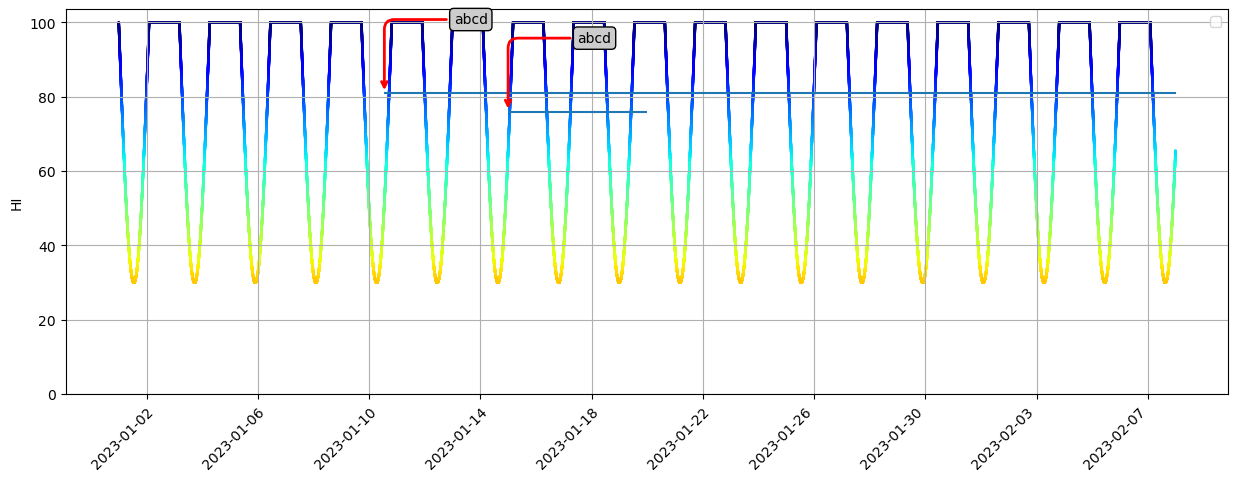

In [6]:
#sns.set_style(style='whitegrid')
#sns.set_theme(font_scale=1)
fig,ax=plt.subplots(figsize=(15,5))
sns.scatterplot(data=data,x='timestamp',y='HI',hue='HI',palette=cmap,
                edgecolor='face',s=3,hue_norm=norm
                )
ticks=ax.get_xticks()
print(ticks)
xmin,xmax=np.min(data['timestamp']),np.max(data['timestamp'])

print(xmin,xmax)
bbox = dict(boxstyle="round", fc="0.8")

arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10",
    facecolor='red',linewidth=2,edgecolor='red')

xyoffset=50
for i,interval in enumerate(datetime_intervals.iterrows()):
    print(interval)
    ypos=76
    plt.hlines(ypos+i*5, max([interval[1]['begin'],xmin]), min([interval[1]['end'],xmax]))
    plt.annotate('abcd',(interval[1]['begin'],ypos+i*5,),bbox=bbox,arrowprops=arrowprops,xytext=(xyoffset,xyoffset),textcoords='offset points',annotation_clip=False)

#plt.ylim(0,140)
ax.grid()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.xlabel(None)
plt.ylim(bottom=0)
ticks=ax.get_xticks()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.legend([])
print(ticks)
plt.show()